<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

 
<center><h2 style="font-size:2em;color:#840700">   Caso de estudio: Ventas </h4></center>

<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/ventas.jpg" align="left" style="width:400px"/></td>
<td>

* **Wes McKinney**, empezó a desarrollar Pandas en el año 2008 mientras trabajaba en *AQR Capital* [https://www.aqr.com/] por la necesidad que tenía de una herramienta flexible de alto rendimiento para realizar análisis cuantitativos en datos financieros. 
* Antes de dejar AQR convenció a la administración de la empresa de distribuir esta biblioteca bajo licencia de código abierto.
* **Pandas** es un acrónimo de **PANel DAta analysiS**
   
    
<br>
</td>
</tr>
</table>

## Integrantes

Nombre 1: Juan Pedro Escamilla Gonzalez

Nombre 2: Salvador Josue Perez Chi

### Ejercicio

Utilzar los archivos "datos/ventas/*.txt" para contestar las siguientes preguntas. A continuación el código propuesto para obtener el dataframe:

```python
files = glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df=df.dropna(axis='rows',how='any')
df=df[df['Quantity Ordered']!='Quantity Ordered'] 
```

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

<div class="alert alert-success">
    
0. Explicar que hace el código de arriba
    
</div> 

Inicialmente la variable files almacena todos los archivos con extensión txt, en la siguiente linea se concatenan todos los arhivos almacenados con la variable files, para realizar esto se hace un ciclo for usando una sintaxis simplificada caracteristica de python y se lee cada uno de los archivos .txt para concatenarlos y crear un dataframe con toda la información. 
Usando la funcion dropna, se eliminan las filas que contengan datos faltantes y por ultimo se filtra el dataframe para unicamente mantener filas con valores validos, es decir, se eliminan filas de encabezados. 

<div class="alert alert-success">
    
1. Encuentre el número de productos que se adquirieron en Los Angeles, CA
    
</div> 

In [92]:
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df = df.dropna(axis='rows',how='any')
df = df[df['Quantity Ordered']!='Quantity Ordered'] 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [93]:
productos_LA = df[df["Purchase Address"].str.contains('Los Angeles')]["Quantity Ordered"].astype(int).sum()
print(f'Numero de productos que se adquirieron en Los Angeles, CA: {productos_LA}')

Numero de productos que se adquirieron en Los Angeles, CA: 33289


<div class="alert alert-success">
    
2. ¿Cuántos iPhone se vendieron?

    
</div> 

In [94]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
iphone = df[df['Product'] == 'iPhone']['Quantity Ordered'].sum()
print('Se vendieron:', iphone)

Se vendieron: 6849


<div class="alert alert-success">
    
3. ¿Cuánto fue su ganancia por venta de baterías? 
    
</div> 

In [95]:
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df = df.dropna(axis='rows',how='any')
df = df[df['Quantity Ordered']!='Quantity Ordered'] 

df_bat = df[df["Product"].str.contains('Batteries')]
df_bat.loc[:, 'Quantity Ordered'] = pd.to_numeric(df_bat['Quantity Ordered'])
df_bat.loc[:, 'Price Each'] = pd.to_numeric(df_bat['Price Each'])
ganancia = (df_bat["Quantity Ordered"] * df_bat["Price Each"]).sum()
print('La ganancia por baterías fue: $', round(ganancia, 2))

La ganancia por baterías fue: $ 198859.23


<div class="alert alert-success">
    
4. ¿Cuál fue el código postal que más ordenes realizó?

    
</div> 

In [96]:
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df = df.dropna(axis='rows',how='any')
df = df[df['Quantity Ordered']!='Quantity Ordered'] 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [97]:
df[['direccion','ciudad','cp']] = df['Purchase Address'].str.split(pat = ',', expand = True)
df[['Estado','cp']] = df['cp'].str.split(expand=True)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
cp_max = df.groupby('cp')['Quantity Ordered'].sum().max()
print('El cp con más ordenes fue:', cp_max)

El cp con más ordenes fue: 50239


<div class="alert alert-success">
    
5.  a) ¿Cuál fue el producto con más ganancias?
    
    b) ¿Cuál fue el producto con más unidades vendidas?

    
</div> 

In [98]:
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df = df.dropna(axis='rows',how='any')
df = df[df['Quantity Ordered']!='Quantity Ordered'] 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [99]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['TotalPrice'] = df['Quantity Ordered'] * df['Price Each']
producto_max=df.groupby('Product')['TotalPrice'].sum().idxmax()
precio = df.groupby('Product')['TotalPrice'].sum().max()
print('El producto con más ganancias fue:', producto_max ,'$', precio  )

El producto con más ganancias fue: Macbook Pro Laptop $ 8037600.0


In [100]:
producto_vendido = df.groupby('Product')['Quantity Ordered'].sum().idxmax()
unidades = df.groupby('Product')['Quantity Ordered'].sum().max()
print('El producto más vendido fue:', producto_vendido,'con', unidades, 'unidades')

El producto más vendido fue: AAA Batteries (4-pack) con 31017 unidades


<div class="alert alert-success">
    
6. ¿Cuales son los 5 productos más vendidos?     
</div> 

In [101]:
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df = df.dropna(axis='rows',how='any')
df = df[df['Quantity Ordered']!='Quantity Ordered'] 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [102]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df_vendidos = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).index.tolist()
print('Los producto más vendidos son:', df_vendidos[:5])

Los producto más vendidos son: ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'USB-C Charging Cable', 'Lightning Charging Cable', 'Wired Headphones']


<div class="alert alert-success">
    
7.  ¿Cuales son los 5 productos con las ganancias más altas?

    
</div> 

In [103]:
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df = df.dropna(axis='rows',how='any')
df = df[df['Quantity Ordered']!='Quantity Ordered'] 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [104]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['TotalPrice'] = df['Quantity Ordered'] * df['Price Each']

df_precio = df.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False).index.tolist()
print('Los productos con más ganacia son:', df_precio[:5])

Los productos con más ganacia son: ['Macbook Pro Laptop', 'iPhone', 'ThinkPad Laptop', 'Google Phone', '27in 4K Gaming Monitor']


<div class="alert alert-success">
    
8. ¿A qué hora recomendaría mostrar anuncios para maximizar la probabilidad de que el cliente compre un producto?     
</div> 

In [111]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
hr = df['Order Date'].dt.strftime('%H').value_counts()
print(f'El momento mas recomendado para mostrar anuncios es a las {hr.idxmax()} horas')


El momento mas recomendado para mostrar anuncios es a las 19 horas


<div class="alert alert-success">
    
 9. 
    a) ¿Cuál es el día de más ganancias por cada mes?  
    b) ¿Cuál es el mes con más ganancias y el de menos ganancias?
    
</div> 

In [211]:
# a
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df = df.dropna(axis='rows',how='any')
df = df[df['Quantity Ordered']!='Quantity Ordered']
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

df.loc[:, 'Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df.loc[:, 'Price Each'] = pd.to_numeric(df['Price Each'])
df["Mes"] = df["Order Date"].dt.month

df['Ganancia'] = df['Quantity Ordered'] * df['Price Each']
df['Ganancia'] = pd.to_numeric(df['Ganancia'])

dia_max_ganancia = df.groupby(['Mes'])['Ganancia'].idxmax()
dias_max_ganancia = df.loc[dia_max_ganancia].drop_duplicates(subset='Mes')[['Order Date', 'Ganancia']]
dias_max_ganancia


,Order Date,Ganancia
8791,2019-04-26 12:48:00,600.00
8791,2019-08-22 16:54:00,149.99
8791,2019-12-07 18:50:00,149.99
8791,2019-02-05 17:10:00,150.00
8791,2019-01-31 17:47:00,1999.98
8791,2019-07-28 22:11:00,1700.00
8791,2019-06-10 21:42:00,3.84
8791,2019-03-21 14:21:00,5.98
8791,2019-05-11 01:47:00,11.99
8791,2019-11-15 10:49:00,11.95


El mes con más ganancias es el mes 12.
El mes con menos ganancias es el mes 1.


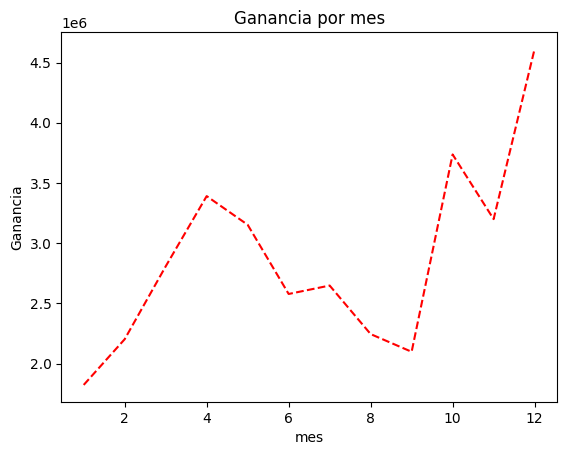

In [215]:
# b
mes_mas_ganancias = df.groupby('Mes')['Ganancia'].sum().idxmax()
mes_menos_ganancias = df.groupby('Mes')['Ganancia'].sum().idxmin()
print(f"El mes con más ganancias es el mes {mes_mas_ganancias}.")
print(f"El mes con menos ganancias es el mes {mes_menos_ganancias}.")
df.groupby('Mes')['Ganancia'].sum().plot(style='--', color='r',
                                                     title="Ganancia por mes", 
                                                     xlabel='mes',
                                                     ylabel='Ganancia');

<div class="alert alert-success">
    
10. ¿Cuál fue el producto más comprado en San Francisco, CA
    
</div> 

In [196]:
files = glob.glob('datos/Ventas/*.txt')
df =  pd.concat((pd.read_csv(file) for file in files))
df = df.dropna(axis='rows',how='any')
df = df[df['Quantity Ordered']!='Quantity Ordered']

In [209]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

productos_SF = df[df["Purchase Address"].str.contains('San Francisco')]
productos_SF = productos_SF.groupby('Product')['Quantity Ordered'].sum()
print(f'El producto más comprado en San Francisco, CA fue {productos_SF.idxmax()}')

El producto más comprado en San Francisco, CA fue AAA Batteries (4-pack)


<div class="alert alert-success">
    
11. Escribir una conclusión del ejercicio (ventajas de usar pandas, herramientas mas utilizadas en este ejercicio, etc). 
    
</div> 

La ventaja de usar pandas se encuentra en la facilidad de limpiar los datos y hacer busquedas en los dataframes, de no tener estas herramientas seria necesario crear multiples variables y ciclos for para poder recorrer los datos y encontrar la informacion. Para esta actividad se hizo uso de herramientas como la funcion groupby que nos permitio agrupar datos para facilitar el analizarlos, asi como la herramienta de indexacion que nos brinda pandas donde podemos crear mascaras booleanas para filtrar los datos.